In [1]:
datatrain_image_path = '/kaggle/input/face-detection-dataset/images/train'
dataval_image_path = '/kaggle/input/face-detection-dataset/images/val'
datatrain_labels_path = '/kaggle/input/face-detection-dataset/labels/train'
dataval_labels_path = '/kaggle/input/face-detection-dataset/labels/val'

In [2]:
import cv2
import random 
import os 
import matplotlib.pyplot as plt 

In [3]:
def visualize_image_with_labels(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get image dimensions
    height, width, _ = image.shape
    
    # Read the label file and parse the labels
    labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, box_width, box_height = map(float, line.split())
                # Convert YOLO format to pixel coordinates
                x_center_pixel = x_center * width
                y_center_pixel = y_center * height
                box_width_pixel = box_width * width
                box_height_pixel = box_height * height
                
                # Store label details
                labels.append({
                    "class_id": int(class_id),
                    "x_center": round(x_center_pixel, 2),
                    "y_center": round(y_center_pixel, 2),
                    "box_width": round(box_width_pixel, 2),
                    "box_height": round(box_height_pixel, 2)
                })
                
                # Calculate bounding box corners
                x1 = int(x_center_pixel - box_width_pixel / 2)
                y1 = int(y_center_pixel - box_height_pixel / 2)
                x2 = int(x_center_pixel + box_width_pixel / 2)
                y2 = int(y_center_pixel + box_height_pixel / 2)
                
                # Draw the rectangle
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f'Class {int(class_id)}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    # Display the image and the labels
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
    # Add label details below the image
    if labels:
        label_text = "\n".join([f"Class {label['class_id']}: x_center={label['x_center']}, y_center={label['y_center']}, width={label['box_width']}, height={label['box_height']}" for label in labels])
    else:
        label_text = "No labels found."
    
    plt.title(label_text, fontsize=10)
    plt.show()

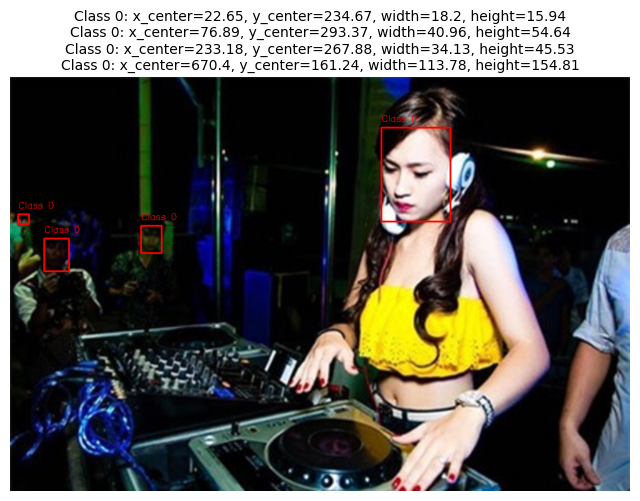

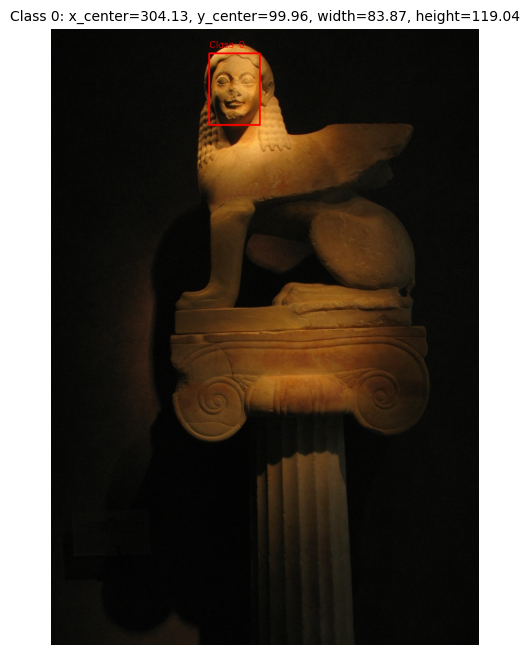

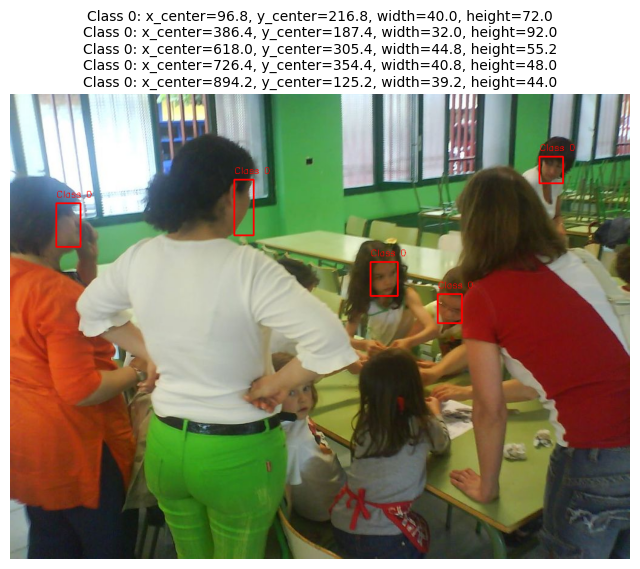

In [4]:
# Select a few random images to visualize
num_images_to_visualize = 3  # Number of images you want to visualize
image_files = [f for f in os.listdir(datatrain_image_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_images = random.sample(image_files, num_images_to_visualize)

# Visualize selected images
for image_file in selected_images:
    image_path = os.path.join(datatrain_image_path, image_file)
    
    # Find corresponding label file
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(datatrain_labels_path, label_file)
    
    # Visualize the image with labels
    visualize_image_with_labels(image_path, label_path)

# split the Data

In [8]:
# import shutil 

# # Chemins des répertoires de sortie
# train_image_path = '/kaggle/working/dataset/images/train'
# val_image_path = '/kaggle/working/dataset/images/val'
# train_label_path = '/kaggle/working/dataset/labels/train'
# val_label_path = '/kaggle/working/dataset/labels/val'

# # Créer les répertoires si nécessaire
# os.makedirs(train_image_path, exist_ok=True)
# os.makedirs(val_image_path, exist_ok=True)
# os.makedirs(train_label_path, exist_ok=True)
# os.makedirs(val_label_path, exist_ok=True)


In [ ]:
# # Liste des fichiers d'images
# datatrain_image_files = [f for f in os.listdir(data_image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
# dataval_image_files = [f for f in os.listdir(data_image_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# # Mélanger les fichiers pour garantir un bon échantillonnage
# random.shuffle(image_files)

# train_files = datatrain_image_files[]
# val_files = dataval_image_files[]

In [ ]:
# # Fonction pour copier les fichiers (images et labels)
# def copy_files(image_list, src_image_path, src_label_path, dest_image_path, dest_label_path):
#     for image_file in image_list:
#         # Chemin source de l'image
#         src_image = os.path.join(src_image_path, image_file)
#         # Chemin source du fichier label correspondant
#         label_file = os.path.splitext(image_file)[0] + '.txt'
#         src_label = os.path.join(src_label_path, label_file)

#         # Chemin destination
#         dest_image = os.path.join(dest_image_path, image_file)
#         dest_label = os.path.join(dest_label_path, label_file)

#         # Copier l'image
#         shutil.copy(src_image, dest_image)
#         # Copier le label si présent
#         if os.path.exists(src_label):
#             shutil.copy(src_label, dest_label)

In [ ]:
# # Copier les fichiers pour l'entraînement
# copy_files(train_files, datatrain_image_path, datatrain_labels_path, train_image_path, train_label_path)

# # Copier les fichiers pour la validation
# copy_files(val_files, dataval_image_path, dataval_labels_path, val_image_path, val_label_path)

# print(f"Train set: {len(train_files)} images")
# print(f"Validation set: {len(val_files)} images")

In [5]:
data_yaml = {
    'dataset': '/kaggle/input/face-detection-dataset',
    'train':'/kaggle/input/face-detection-dataset/images/train',
    'train_labels':'/kaggle/input/face-detection-dataset/labels/train',
    'val':'/kaggle/input/face-detection-dataset/images/val',
    'val_labels':'/kaggle/input/face-detection-dataset/labels/val',
    'names' : ['Human Face']
}

In [7]:
import yaml 

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

In [8]:
with open('/kaggle/working/data.yaml', 'r') as file:
    loaded_config = yaml.safe_load(file)

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 16.3 MB/s eta 0:00:0000:01


In [11]:
pip install tensorboard


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov5s.pt')
model.train(
    data='/kaggle/working/data.yaml',
    epochs=50
)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vi

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/face-detection-dataset/labels/train... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [01:10<00:00, 191.19it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/face-detection-dataset/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:19<00:00, 169.61it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.58G      1.351      1.039      1.213         48        640: 100%|██████████| 837/837 [03:45<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.97it/s]

                   all       3347      10299      0.876      0.748      0.833      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.91G      1.245     0.7769      1.092         47        640: 100%|██████████| 837/837 [03:41<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:24<00:00,  4.22it/s]


                   all       3347      10299      0.864      0.741      0.828      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.76G      1.293     0.8377       1.11         58        640: 100%|██████████| 837/837 [03:39<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:24<00:00,  4.26it/s]


                   all       3347      10299      0.868      0.724      0.807      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.53G      1.318     0.8745      1.133         59        640: 100%|██████████| 837/837 [03:38<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:24<00:00,  4.31it/s]


                   all       3347      10299      0.872      0.733      0.812      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.79G       1.29     0.8341      1.117         49        640: 100%|██████████| 837/837 [03:38<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:24<00:00,  4.31it/s]


                   all       3347      10299      0.875      0.735      0.819      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.56G      1.269     0.8009      1.104         81        640:  97%|█████████▋| 811/837 [03:31<00:06,  3.81it/s]

In [ ]:
# Charger TensorBoard dans le notebook
%load_ext tensorboard

# Lancer TensorBoard avec les logs YOLO (par défaut dans 'runs/train')
%tensorboard --logdir runs/train



In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/runs/detect/train4/results.png')
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')  # Turn off axes for cleaner display
plt.show()